<a href="https://colab.research.google.com/github/robert-shepherd/fpl/blob/main/Project_3_8_random_forest_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random forest model


---

The purpose of this script is to develop the random forest model

Data sources:
* Data post feature engineering:  https://raw.githubusercontent.com/robert-shepherd/fpl/main/fpl_features.csv


In [ ]:
# Loading libraries
import pandas as pd
import pickle
import numpy as np
import scipy.stats as stats
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Model librariest
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

# Import measures
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Setup

In [ ]:
# Reading in files from static output
X_train_url = 'https://raw.githubusercontent.com/robert-shepherd/fpl/main/X_train.csv'
X_test_url = 'https://raw.githubusercontent.com/robert-shepherd/fpl/main/X_test.csv'
Y_train_url = 'https://raw.githubusercontent.com/robert-shepherd/fpl/main/Y_train.csv'
Y_test_url = 'https://raw.githubusercontent.com/robert-shepherd/fpl/main/Y_test.csv'

X_train = pd.read_csv(X_train_url)
X_test = pd.read_csv(X_test_url)
Y_train = pd.read_csv(Y_train_url,squeeze=True)
Y_test = pd.read_csv(Y_test_url,squeeze=True)

print('X_train      : ',X_train.shape)
print('X_test       : ',X_test.shape)
print('Y_train      : ',Y_train.shape)
print('Y_test       : ',Y_test.shape)

X_train      :  (40388, 40)
X_test       :  (10098, 40)
Y_train      :  (40388,)
Y_test       :  (10098,)


In [ ]:
# Creating a copy with missing values removed
train_na = X_train.isnull().any(axis=1)
test_na = X_test.isnull().any(axis=1)

X_train_no_na = X_train[~train_na]
Y_train_no_na = Y_train[~train_na]

X_test_no_na = X_test[~test_na]
Y_test_no_na = Y_test[~test_na]

print('X_train_no_na      : ',X_train_no_na.shape)
print('X_test_no_na       : ',X_test_no_na.shape)
print('Y_train_no_na      : ',Y_train_no_na.shape)
print('Y_test_no_na       : ',Y_test_no_na.shape)

X_train_no_na      :  (32698, 40)
X_test_no_na       :  (8195, 40)
Y_train_no_na      :  (32698,)
Y_test_no_na       :  (8195,)


## Random forest model

In [ ]:
# Training decision tree model
rf_model = RandomForestRegressor(oob_score=True)
rf_model_fitted = rf_model.fit(X_train_no_na,Y_train_no_na)

In [ ]:
# Predicting on test
y_pred = rf_model_fitted.predict(X_test_no_na)

In [ ]:
# Checking min/max prediction
min_pred = min(y_pred)
max_pred = max(y_pred)
print("Min prediction: {}".format(min_pred))
print("Max prediction: {}".format(max_pred))

Min prediction: -0.11
Max prediction: 8.13


In [ ]:
# Checking out of bag score
rf_model_fitted.oob_score_

0.24988518165257068

## Evaluating bias/variance tradeoff

In [ ]:
# Note: Cross validation not run due to calculation time
# OOB R2 scored used to assess validation performance

In [ ]:
# Checking test MSE
test_mse = mean_squared_error(Y_test_no_na, y_pred)
print("Test MSE: {}".format(test_mse))

Test MSE: 4.825088920073216


In [ ]:
# Checking training MSE
y_pred_rf_train = rf_model_fitted.predict(X_train_no_na)
train_mse = mean_squared_error(Y_train_no_na, y_pred_rf_train)
print("Train MSE: {}".format(train_mse))

Train MSE: 0.6732234999082513


## Identifying optimum tree depth

In [ ]:
# Identifying optimum tree depth
tree_depths = range(1,20)
oob_r2_scores = []

for i in tree_depths:
  model = RandomForestRegressor(max_depth = i, oob_score=True,random_state=1)
  model_fit = model.fit(X_train_no_na,Y_train_no_na)
  oob_r2 = model.oob_score_
  oob_r2_scores.append(oob_r2)

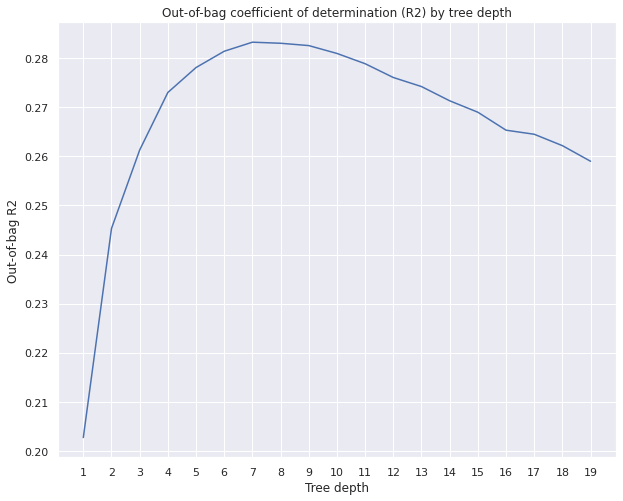

In [ ]:
# Plotting OOB performance by depth
sns.set()
plt.figure(figsize=(10,8))
plt.plot(tree_depths,oob_r2_scores)
plt.title('Out-of-bag coefficient of determination (R2) by tree depth')
plt.xlabel('Tree depth')
plt.ylabel("Out-of-bag R2")
plt.xticks(tree_depths)
plt.show()

In [ ]:
# Find tree depth where CV MSE is lowest
max_score = max(oob_r2_scores)

max_index = oob_r2_scores.index(max_score)

tree_depths[max_index]

7

## Updating tree with max depth of 7



In [ ]:
# Training a model with a max depth of 7
dt_model_upd = RandomForestRegressor(max_depth = 7,oob_score=True)
dt_model_upd_fitted = dt_model_upd.fit(X_train_no_na,Y_train_no_na)

In [ ]:
# Predicting on test
y_pred_dt_upd = dt_model_upd_fitted.predict(X_test_no_na)

In [ ]:
# Checking min/max prediction
min_pred = min(y_pred_dt_upd)
max_pred = max(y_pred_dt_upd)
print("Min prediction: {}".format(min_pred))
print("Max prediction: {}".format(max_pred))

Min prediction: 0.009992002137234187
Max prediction: 6.536322391035111


In [ ]:
# Checking OOB score
oob_r2 = rf_model_fitted.oob_score_

print("OOB R2: {}".format(oob_r2))

OOB R2: 0.24988518165257068


In [ ]:
# Checking test MSE
test_mse = mean_squared_error(Y_test_no_na, y_pred_dt_upd)
print("Test MSE: {}".format(test_mse))

Test MSE: 4.718450586345835


In [ ]:
# Checking test R2
r2 = r2_score(Y_test_no_na, y_pred_dt_upd)
print("Test R2: {}".format(r2))

Test R2: 0.25883496955952945


In [ ]:
# Checking training MSE
y_pred_dt_upd_train = dt_model_upd_fitted.predict(X_train_no_na)
train_mse = mean_squared_error(Y_train_no_na, y_pred_dt_upd_train)
print("Train MSE: {}".format(train_mse))

Train MSE: 4.2220064684888055


## Understanding feature importance

In [ ]:
# Checking feature importance
df_columns = X_train_no_na.columns
feature_importance = dt_model_upd_fitted.feature_importances_

feature_df = pd.DataFrame(df_columns,columns=['feature'])
feature_df['feature_importance'] = feature_importance

feature_df[feature_importance > 0].sort_values(by=['feature_importance'],ascending=False)

,feature,feature_importance
6,minutes_lag,0.587251
30,selected_lag,0.094001
29,threat_rolling,0.043739
31,selected_rolling,0.032011
7,minutes_rolling,0.030743
0,opponent_strength,0.025327
25,influence_rolling,0.025180
27,creativity_rolling,0.017136
35,transfers_out_ratio_rolling,0.015511
23,bps_rolling,0.012928


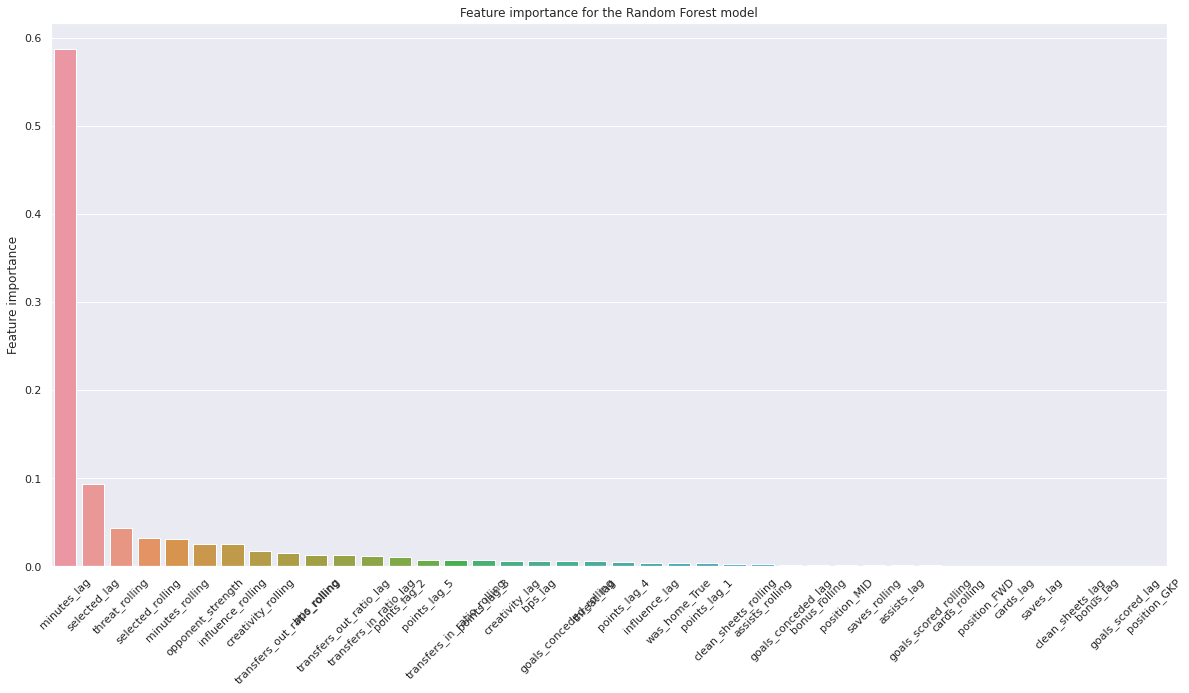

In [ ]:
# Plotting features
significant_features = feature_df[feature_importance > 0].sort_values(by=['feature_importance'],ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(x="feature", y="feature_importance", data=significant_features)
plt.title("Feature importance for the Random Forest model")
plt.xlabel("")
plt.ylabel("Feature importance")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Checking top 20 feature importances
df_columns = X_train_no_na.columns
feature_importance = dt_model_upd_fitted.feature_importances_

feature_df = pd.DataFrame(df_columns,columns=['feature'])
feature_df['feature_importance'] = feature_importance

feature_df[feature_importance > 0].sort_values(by=['feature_importance']
                                               ,ascending=False).head(20)

,feature,feature_importance
6,minutes_lag,0.587251
30,selected_lag,0.094001
29,threat_rolling,0.043739
31,selected_rolling,0.032011
7,minutes_rolling,0.030743
0,opponent_strength,0.025327
25,influence_rolling,0.025180
27,creativity_rolling,0.017136
35,transfers_out_ratio_rolling,0.015511
23,bps_rolling,0.012928


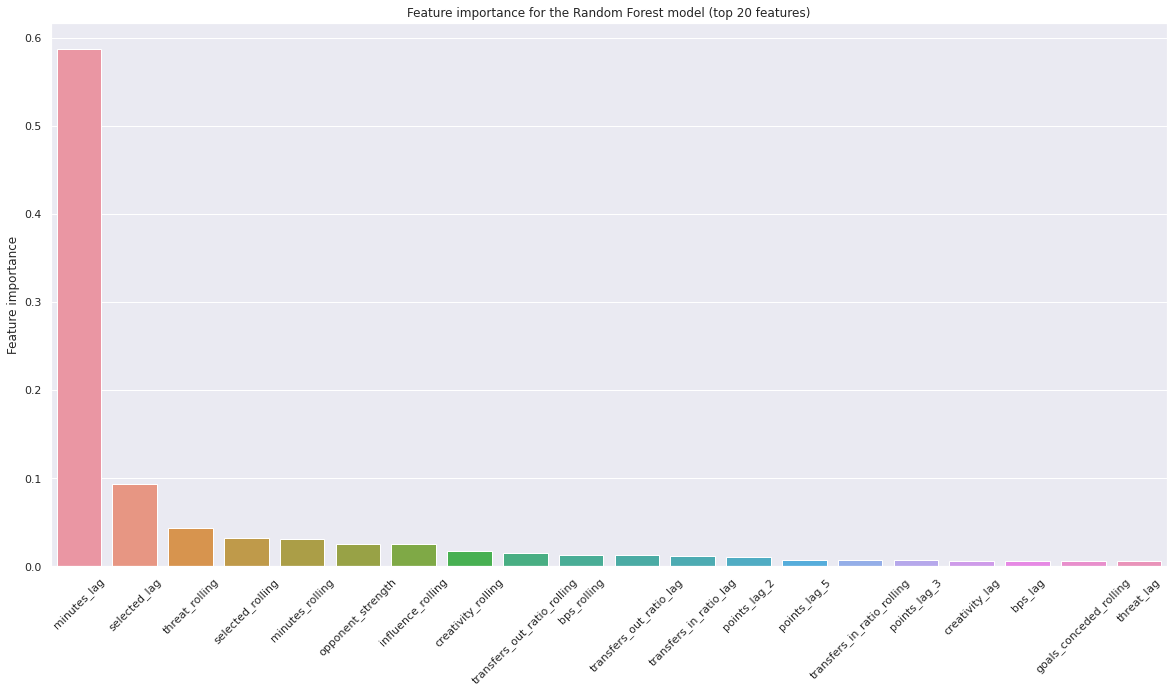

In [ ]:
# Plotting top 20 features
significant_features = feature_df[feature_importance > 0].sort_values(by=['feature_importance'],ascending=False)

top_20_features = significant_features.head(20)

plt.figure(figsize=(20,10))
sns.barplot(x="feature", y="feature_importance", data=top_20_features)
plt.title("Feature importance for the Random Forest model (top 20 features)")


plt.xlabel("")
plt.ylabel("Feature importance")
plt.xticks(rotation=45)
plt.show()